In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Reading dataset
data = pd.read_csv('/content/DataSet.csv')

In [ ]:
data.shape

(5614, 18)

In [ ]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [ ]:
data.isnull().sum()

title                  3567
location               4397
department             5197
salary_range           5396
company_profile        4614
description            4413
requirements           4603
benefits               4911
telecommuting          4421
has_company_logo       4422
has_questions          4422
employment_type        4600
required_experience    4850
required_education     4855
industry               4691
function               4823
fraudulent             4426
in_balanced_dataset    4426
dtype: int64

In [ ]:
columns=['telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

data.fillna(' ', inplace=True)

In [ ]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [ ]:
data.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False).head(20)

,fraudulent,title
0,,4426
1,f,1161
2,t,27


Text(0.5, 0, 'Countries')

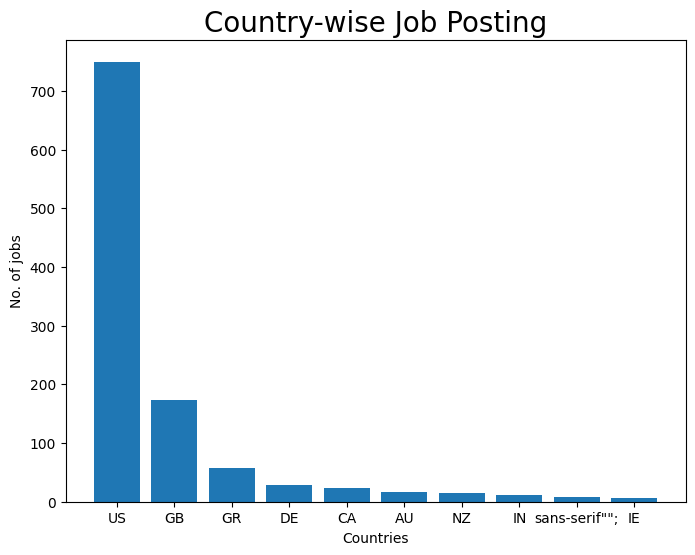

In [ ]:
#Visualize job postings by countries
def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)

country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

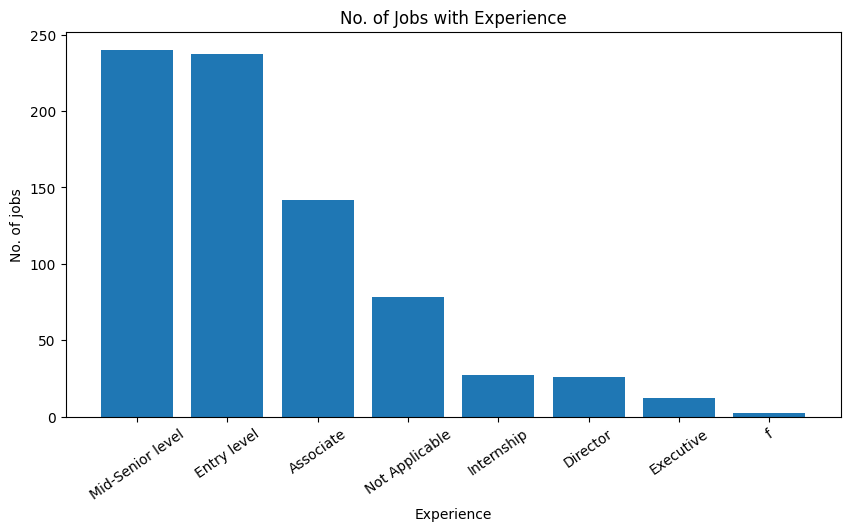

In [ ]:
#Visualize the required experiences in the jobs
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#Most frequent jobs
print(data.title.value_counts()[:10])

                                                                           3567
English Teacher Abroad                                                       68
Customer Service Associate                                                   25
  <w:LsdException Locked=""false"" Priority=""73"" SemiHidden=""false""      14
English Teacher Abroad                                                       13
  <w:LsdException Locked=""false"" Priority=""72"" SemiHidden=""false""      13
  <w:LsdException Locked=""false"" Priority=""51""                           12
  <w:LsdException Locked=""false"" Priority=""71"" SemiHidden=""false""      12
  <w:LsdException Locked=""false"" Priority=""70"" SemiHidden=""false""      12
<p> </p>                                                                     12
Name: title, dtype: int64


In [ ]:
#Titles and count of fraudulent jobs
print(data[data.fraudulent==1].title.value_counts()[:10])

Series([], Name: title, dtype: int64)


In [ ]:
#combine text in a single column to start cleaning our data
data['text']=data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [ ]:
data.head()

,fraudulent,in_balanced_dataset,text
0,f,f,"Marketing Intern US, NY, New York <h3>We're Fo..."
1,f,f,"Customer Service - Cloud Video Production NZ, ..."
2,f,f,"Commissioning Machinery Assistant (CMA) US, IA..."
3,f,f,"Account Executive - Washington DC US, DC, Wash..."
4,f,f,"Bill Review Manager US, FL, Fort Worth <p>Spot..."


In [ ]:
#Separate fraud and actual jobs
fraudjobs_text = data[data.fraudulent==1].text
actualjobs_text = data[data.fraudulent==0].text

In [ ]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [ ]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
data['text'][0]

"marketing intern us, ny, new york <h3>we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.</h3> <p>we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.</p> <p>food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.</p> <p>we're located chelsea, new york city.</p> <p>food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.</p> <ul

In [ ]:
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [ ]:
#Train-test shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3929,)
(3929,)
(1685,)
(1685,)


In [ ]:
# what does X-train and y_train contain
print(y_train)
print(X_train)

1565    f
4204     
4530     
2424     
992      
       ..
1342     
574      
3964     
4891     
3273     
Name: fraudulent, Length: 3929, dtype: object
1565    software development il, , <p>with offices her...
4204                                                     
4530                                                     
2424                                                     
992                name=""list table 1 light accent 4""/>
                              ...                        
1342    unhidewhenused=""false"" name=""colorful shadi...
574                 font-family:""calibri"" sans-serif"";
3964                                                     
4891                                                     
3273                                                     
Name: text, Length: 3929, dtype: object


In [ ]:
#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [ ]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 684)	1
  (0, 692)	1
  (0, 723)	1
  (0, 873)	1
  (0, 1035)	1
  (0, 1036)	1
  (0, 1410)	1
  (0, 1925)	1
  (0, 2111)	1
  (0, 2247)	1
  (0, 2413)	2
  (0, 2654)	2
  (0, 2656)	1
  (0, 2870)	1
  (0, 3125)	1
  (0, 3439)	1
  (0, 3559)	1
  (0, 3653)	1
  (0, 4251)	1
  (0, 4317)	1
  (0, 4445)	1
  (0, 4631)	1
  (0, 4649)	1
  (0, 4669)	1
  (0, 4761)	1
  :	:
  (3917, 315)	1
  (3917, 4728)	1
  (3917, 7056)	1
  (3917, 7112)	1
  (3917, 9152)	1
  (3919, 263)	1
  (3919, 4728)	1
  (3919, 7056)	1
  (3919, 7112)	1
  (3919, 7822)	1
  (3919, 9152)	1
  (3919, 11821)	1
  (3920, 5173)	1
  (3920, 6572)	1
  (3924, 492)	1
  (3924, 2577)	1
  (3924, 4728)	1
  (3924, 7822)	1
  (3924, 10560)	1
  (3924, 12180)	1
  (3925, 2022)	1
  (3925, 4733)	1
  (3925, 4996)	1
  (3925, 10282)	1
  (3925, 10516)	1


In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1685x13703 sparse matrix of type '<class 'numpy.int64'>'
	with 69468 stored elements in Compressed Sparse Row format>

# Model Building & Evaluation

In [ ]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 8.79 ms, sys: 0 ns, total: 8.79 ms
Wall time: 12.2 ms


MultinomialNB()

In [ ]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[' ' 'f' ' ' ... ' ' 'f' ' ']


In [ ]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))

Classification Accuracy: 0.9827893175074184
Classification Report

              precision    recall  f1-score   support

                   1.00      0.98      0.99      1318
           f       0.94      0.99      0.96       364
           t       0.40      0.67      0.50         3

    accuracy                           0.98      1685
   macro avg       0.78      0.88      0.82      1685
weighted avg       0.98      0.98      0.98      1685

Confusion Matrix

[[1293   24    1]
 [   1  361    2]
 [   0    1    2]]


Text(95.72222222222221, 0.5, 'Truth')

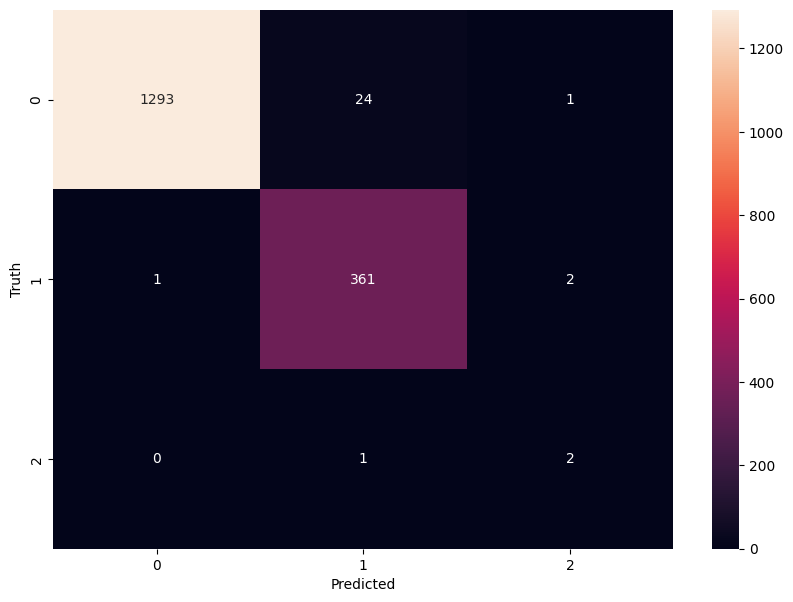

In [ ]:
cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree Classifier

In [ ]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [ ]:
#train the model
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: user 85 ms, sys: 0 ns, total: 85 ms
Wall time: 93.1 ms


DecisionTreeClassifier()

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [ ]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))

Classification Accuracy: 0.9899109792284867
Classification Report

              precision    recall  f1-score   support

                   1.00      0.99      1.00      1318
           f       0.97      0.98      0.98       364
           t       0.40      0.67      0.50         3

    accuracy                           0.99      1685
   macro avg       0.79      0.88      0.82      1685
weighted avg       0.99      0.99      0.99      1685

Confusion Matrix

[[1309    9    0]
 [   4  357    3]
 [   0    1    2]]


Text(95.72222222222221, 0.5, 'Truth')

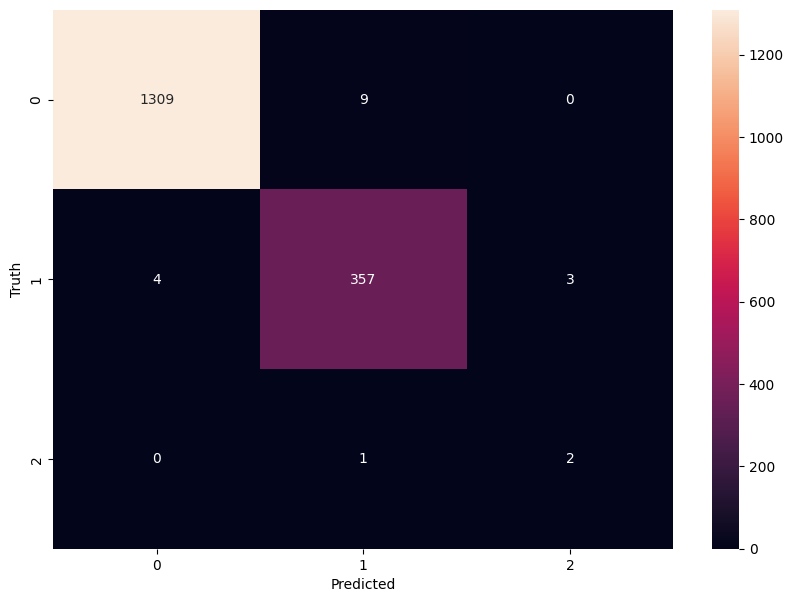

In [ ]:
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
accuracy_score(y_test, y_pred_nb)
print("Navies_Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Decision_tree_Accuracy:", accuracy_score(y_test, y_pred_class))

Navies_Classification Accuracy: 0.9827893175074184
Decision_tree_Accuracy: 0.9899109792284867


# Building a Predictive System

In [ ]:
#Lets Predict for a data set
X_test

1884    unhidewhenused=""false"" name=""colorful list ...
693     sales manager germany de, be, berlin <p><b>abo...
4448                                                     
3386                                                     
1720    <w:lsdexception locked=""false"" priority=""32...
                              ...                        
3446                                                     
1735                               mso-style-priority:99;
5302                                                     
190     entry level sales us, ar, little rock <p>gener...
4207                                                     
Name: text, Length: 1685, dtype: object

In [ ]:
print(X_test[693])

sales manager germany de, be, berlin <p><b>about company</b><br>we ticketscript - european market leaders digital self-ticketing. whether it’s massive dance events, festivals, gigs, outdoor cinemas, fairs, theater shows, exhibitions, comedy nights, award ceremonies - all! believe empowering customers. success success. far 50,000 events worked us - beginning. offices london, amsterdam, antwerp, berlin barcelona rapidly expanding across europe.</p> <p><b>the company</b></p> <p>we ticketscript - european market leaders digital self-ticketing. whether it’s massive dance events, festivals, gigs, outdoor cinemas, fairs, theater shows, exhibitions, comedy nights, award ceremonies - all! believe empowering customers. success success. far 50,000 events worked us - beginning. offices london, amsterdam, antwerp, berlin barcelona rapidly expanding across europe.</p> <p><b>the role</b><br>can challenge ticketing industry? sales manager responsible expanding customer base throughout germany generati

In [ ]:
input_text=["microstrategy bi consultant us, , <p>my competent bi deveopment microstrategy healthcare industry. creating dashboards, kpis standard reports"]

In [ ]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

['f']
Real Job


In [ ]:
#Lets check wether predicted result was correct or not
print(y_test[693])

f
